In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

C:\Program Files\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


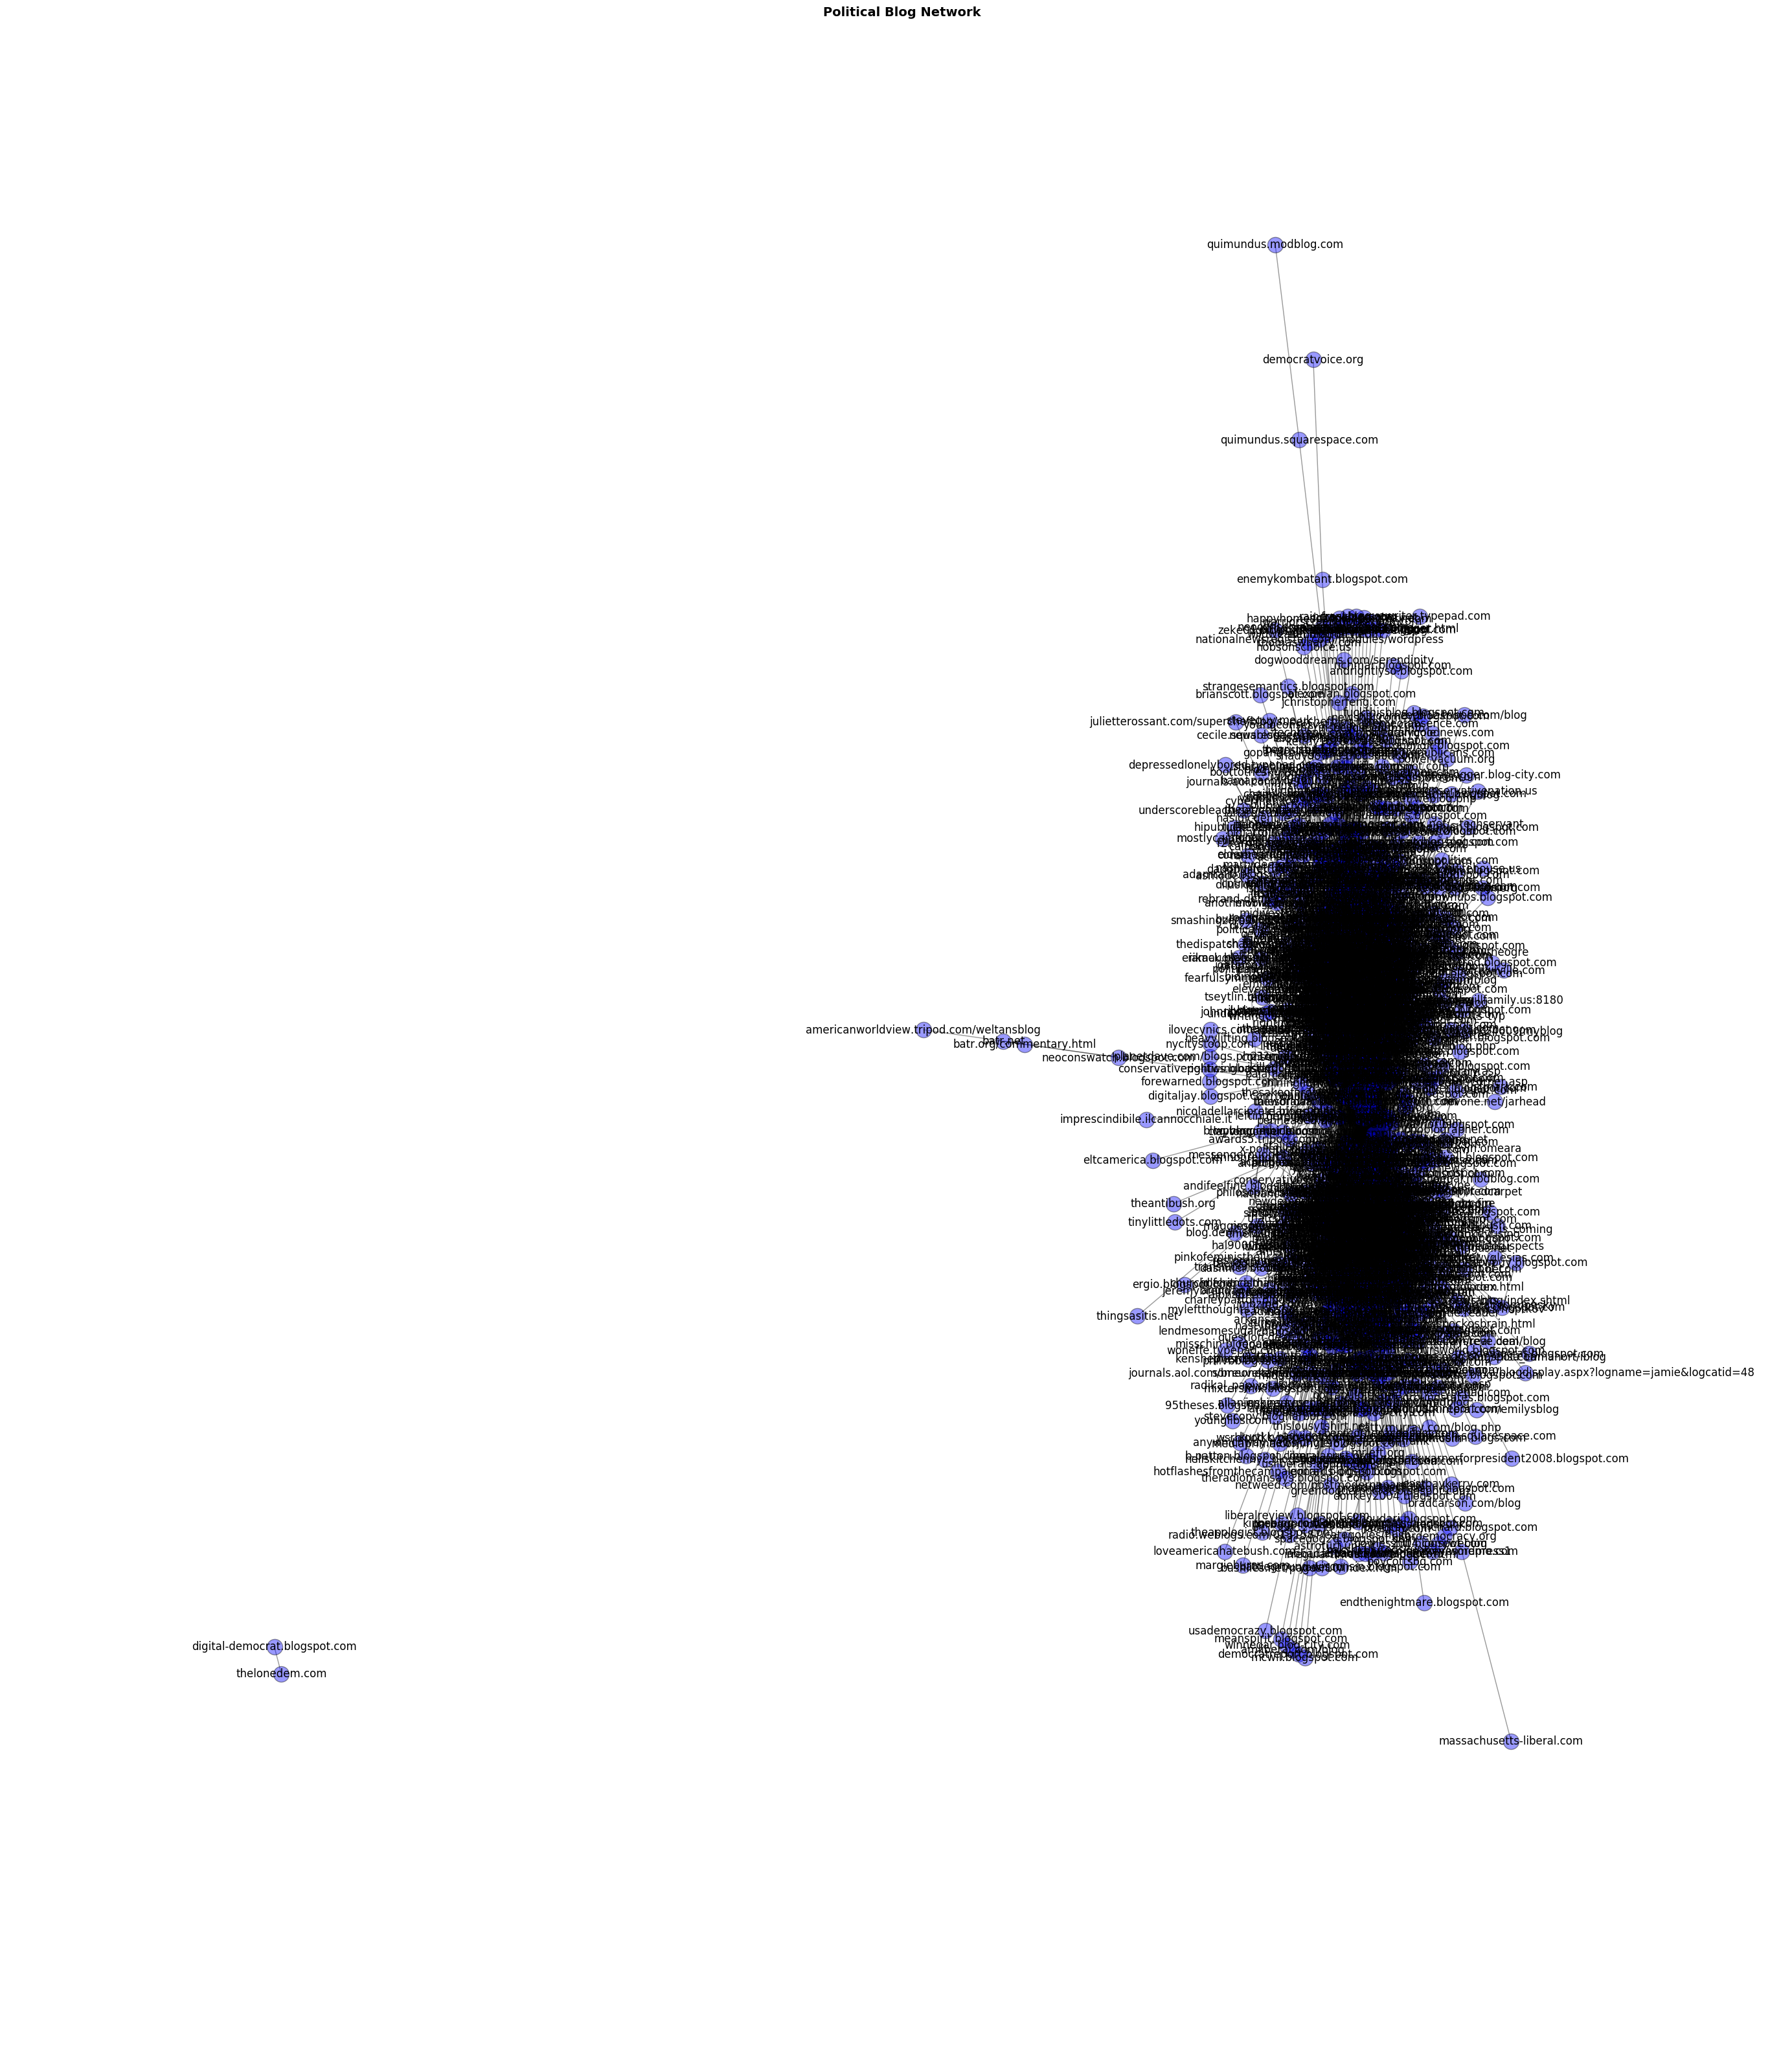

In [4]:
plt.figure(figsize=(35,40))
pos=nx.spring_layout(G, iterations=500, scale=10, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blog Network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [5]:
#First transform the graph to a dataframe
df_blogs = nx.to_pandas_dataframe(G)

In [6]:
df_blogs.head()

,tsrightdominion.blogspot.com,rightrainbow.com,truebluegal.blogspot.com,newleftblogs.blogspot.com,stitt.blogspot.com,jmbzine.com,jeremybrendan.blogspot.com,lashawnbarber.com,gregpalast.com,roxanne.typepad.com,...,counterspin.blogspot.com,blueoregon.com,right-thinking.com,denbeste.nu,mydamascusroad.blogspot.com,spacedog26.blogspot.com,writingcompany.blogs.com/this_isnt_writing_its_typ,stcfoundation.blogspot.com,kensain.com,rogerailes.blogspot.com
tsrightdominion.blogspot.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rightrainbow.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
truebluegal.blogspot.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
newleftblogs.blogspot.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
stitt.blogspot.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
political_blogs = df_blogs

In [8]:
#validate
political_blogs.tail()

,tsrightdominion.blogspot.com,rightrainbow.com,truebluegal.blogspot.com,newleftblogs.blogspot.com,stitt.blogspot.com,jmbzine.com,jeremybrendan.blogspot.com,lashawnbarber.com,gregpalast.com,roxanne.typepad.com,...,counterspin.blogspot.com,blueoregon.com,right-thinking.com,denbeste.nu,mydamascusroad.blogspot.com,spacedog26.blogspot.com,writingcompany.blogs.com/this_isnt_writing_its_typ,stcfoundation.blogspot.com,kensain.com,rogerailes.blogspot.com
spacedog26.blogspot.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
writingcompany.blogs.com/this_isnt_writing_its_typ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stcfoundation.blogspot.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kensain.com,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rogerailes.blogspot.com,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
transposed_political_blogs = df_blogs.T

In [10]:
#Validate
transposed_political_blogs.head()

,tsrightdominion.blogspot.com,rightrainbow.com,truebluegal.blogspot.com,newleftblogs.blogspot.com,stitt.blogspot.com,jmbzine.com,jeremybrendan.blogspot.com,lashawnbarber.com,gregpalast.com,roxanne.typepad.com,...,counterspin.blogspot.com,blueoregon.com,right-thinking.com,denbeste.nu,mydamascusroad.blogspot.com,spacedog26.blogspot.com,writingcompany.blogs.com/this_isnt_writing_its_typ,stcfoundation.blogspot.com,kensain.com,rogerailes.blogspot.com
tsrightdominion.blogspot.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rightrainbow.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
truebluegal.blogspot.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
newleftblogs.blogspot.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
stitt.blogspot.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
transposed_political_blogs.shape

(1224, 1224)

In [12]:
adj_pol_blogs = political_blogs.dot(transposed_political_blogs)

In [13]:
#Validate
adj_pol_blogs.shape

(1224, 1224)

In [14]:
adj_pol_blogs.head()

,tsrightdominion.blogspot.com,rightrainbow.com,truebluegal.blogspot.com,newleftblogs.blogspot.com,stitt.blogspot.com,jmbzine.com,jeremybrendan.blogspot.com,lashawnbarber.com,gregpalast.com,roxanne.typepad.com,...,counterspin.blogspot.com,blueoregon.com,right-thinking.com,denbeste.nu,mydamascusroad.blogspot.com,spacedog26.blogspot.com,writingcompany.blogs.com/this_isnt_writing_its_typ,stcfoundation.blogspot.com,kensain.com,rogerailes.blogspot.com
tsrightdominion.blogspot.com,30.0,5.0,3.0,1.0,0.0,0.0,1.0,19.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,9.0,1.0,3.0,0.0
rightrainbow.com,5.0,19.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,0.0,7.0,0.0,1.0,0.0
truebluegal.blogspot.com,3.0,0.0,29.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,5.0,0.0,8.0,0.0
newleftblogs.blogspot.com,1.0,0.0,0.0,239.0,0.0,0.0,0.0,6.0,24.0,69.0,...,15.0,5.0,0.0,1.0,0.0,0.0,2.0,30.0,10.0,102.0
stitt.blogspot.com,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
#use a new graph for transformations to obtain the values for the influential blogs 
new_G = nx.from_numpy_matrix(adj_pol_blogs.values)
new_G = nx.relabel_nodes(new_G, dict(enumerate(adj_pol_blogs.columns)))

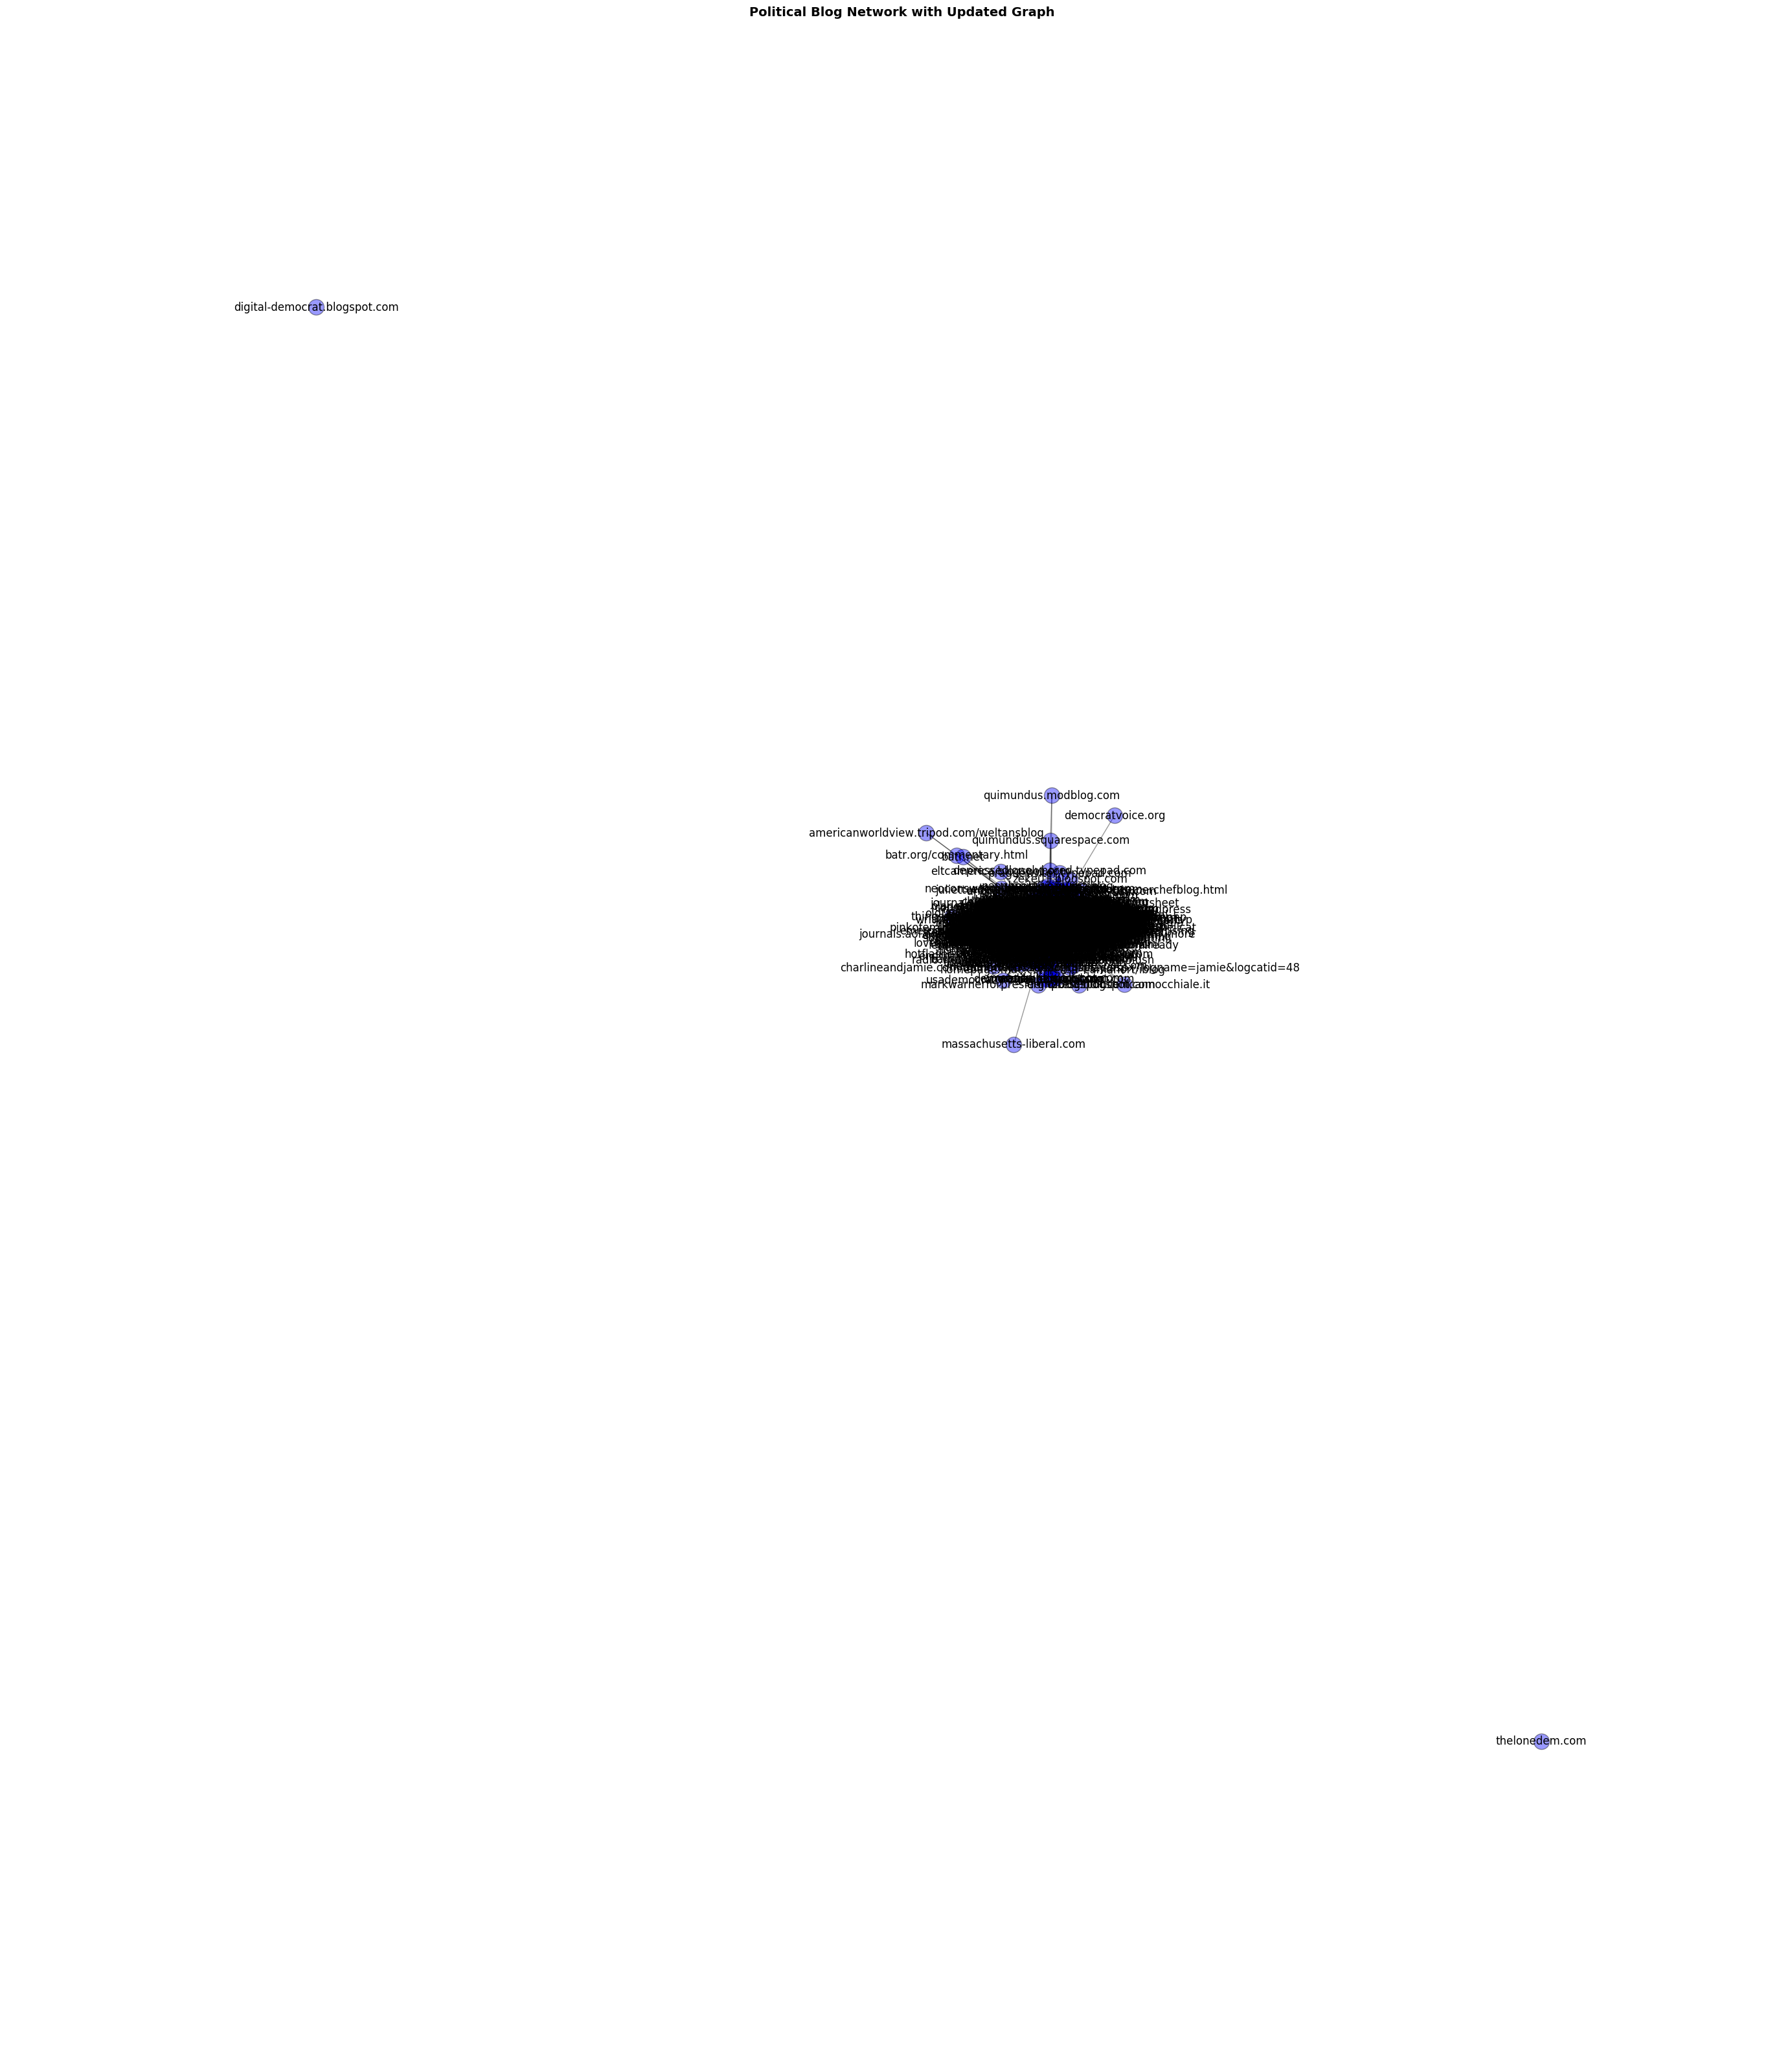

In [16]:
#experimental -- new plot
plt.figure(figsize=(35,40))
pos=nx.spring_layout(new_G, iterations=500, scale=10, k=.3)
nx.draw_networkx_labels(new_G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blog Network with Updated Graph", font)


nx.draw_networkx_nodes(new_G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(new_G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [17]:
#Use the centrality property to sort the values by their influence 
influence = nx.eigenvector_centrality(new_G)

In [18]:
#Then for each blog in the list 
blogs_list = [] 

for node in influence:
    blogs_list.append((node,influence[node]))
    
sorted_blogs_list = blogs_list.sort(key=lambda x: x[1])

In [19]:
a_blogs_list = sorted(blogs_list, key=lambda x: x[1], reverse=True)

The 10 most influential blogs would then be: 

In [20]:
ten_most_influential = a_blogs_list[:10]
blog_names, blog_influence = zip(*ten_most_influential)
blog_names

(u'atrios.blogspot.com',
 u'dailykos.com',
 u'washingtonmonthly.com',
 u'digbysblog.blogspot.com',
 u'bodyandsoul.typepad.com',
 u'liberaloasis.com',
 u'tbogg.blogspot.com',
 u'corrente.blogspot.com',
 u'talkingpointsmemo.com',
 u'dneiwert.blogspot.com')

### 3.  What are the 10 least influential blogs?



In [21]:
#The lease influential blogs would be: 
b_blogs_list = sorted(blogs_list, key=lambda x: x[1])

In [22]:
ten_least_influential = b_blogs_list[:10]
b_blog_names, b_blog_influence = zip(*ten_least_influential)
b_blog_names

(u'thelonedem.com',
 u'digital-democrat.blogspot.com',
 u'americanworldview.tripod.com/weltansblog',
 u'quimundus.modblog.com',
 u'batr.org/commentary.html',
 u'batr.net',
 u'democratvoice.org',
 u'quimundus.squarespace.com',
 u'massachusetts-liberal.com',
 u'thingsasitis.net')

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

In [27]:
from networkx.algorithms import bipartite

In [34]:
Q =nx.read_gml("polblogs.gml")

In [38]:
Q.node

{u'tsrightdominion.blogspot.com': {u'source': u'Blogarama', u'value': 1},
 u'rightrainbow.com': {u'source': u'Blogarama', u'value': 1},
 u'gregpalast.com': {u'source': u'LabeledManually', u'value': 0},
 u'younglibs.com': {u'source': u'Blogarama', u'value': 0},
 u'blotts.org/polilog': {u'source': u'Blogarama', u'value': 0},
 u'marylandpolitics.blogspot.com': {u'source': u'BlogCatalog', u'value': 1},
 u'blogitics.com': {u'source': u'eTalkingHead', u'value': 0},
 u'thesakeofargument.com': {u'source': u'Blogarama', u'value': 1},
 u'joebrent.blogspot.com': {u'source': u'Blogarama', u'value': 0},
 u'thesiliconmind.blogspot.com': {u'source': u'Blogarama', u'value': 0},
 u'40ozblog.blogspot.com': {u'source': u'Blogarama,BlogCatalog', u'value': 0},
 u'randomjottings.net': {u'source': u'eTalkingHead', u'value': 1},
 u'sonsoftherepublic.com': {u'source': u'Blogarama', u'value': 1},
 u'rightvoices.com': {u'source': u'CampaignLine', u'value': 1},
 u'americasteen.tk': {u'source': u'Blogarama', u'val

In [39]:
nx.isconnected(Q)

AttributeError: 'module' object has no attribute 'isconnected'